# Fetching data from remote sites - https://reurl.cc/exo167

- [COVID-19 Dashboard by JHU](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)
- [Taiwan CDC Dashboard](https://sites.google.com/cdc.gov.tw/2019ncov/taiwan)

## Import depencies and libaries

In [81]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '\\Google Drive\\adventures\\'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
# import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'figure\\'
covid_dir = groot_dir + 'covid19\\'
dataroot_dir = groot_dir

gfigure = lambda name: figure_dir + name + '.png'

output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)

def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)
    
def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath

TAIWAN_CSV = '1I5yqulrZSHPSQkxT3oqt_3uVAhPolOEP'
JHU_CSSE = 'https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series'
TITANIC_TRAIN = '1PrxmUKRQWSlYgtMU13l1E0ob4hVJI20O'
MNIST_TRAIN = '1E-uJ0zqqAfpsVjoOSzqF5TXhDfPNlkQ5'
MNIST_TRAIN_LABEL = '13clNJ2cd2I90W3DEkDBKjZSDNNEqqx3B'
MNIST_TEST = '1zVpVHJl5YABa3qExt1K-O3WaEHXTJekg'
MNIST_TEST_LABEL = '1qci_-dqubnRN-cdrCsbYaUAxyO7_jH9z'

print('ML project #1 - how to fetch date from remote site')
print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('\nData storage points to ==>', groot_dir)
 
print('\nLibraries and dependenciess imported')
print_now()

ML project #1 - how to fetch date from remote site

Running on win32
Python Version 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]

Data storage points to ==> C:\Users\TyKA\Google Drive\adventures\

Libraries and dependenciess imported
2021-02-26 22:01:30.079920


## helpers for fetching remote files

In [2]:
import requests

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)


def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
print('helpers imported')
print_now()   

helpers imported
2021-02-26 20:33:55.959517


# ① Fetch files by gdown or requests 

## 1.1 - Download JHU CSSE data files (下載 JHU 每日更新資料)

- [Coronavirus COVID-19 Global Cases by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU)](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)
- [Data on Github](https://bit.ly/2Alrmgp)

In [3]:
# shorten_jhu_github = https://bit.ly/2Alrmgp

github = JHU_CSSE

csv_holder = 'time_series_covid19_%s_global.csv'

csvlist = ['confirmed', 'deaths', 'recovered']

jhudata = lambda x: csv_holder % x

put_data_here = os.path.join(groot_dir, 'covid19') + '\\'

print('defintion loaded')
print_now()

defintion loaded
2021-02-26 20:34:03.606203


In [16]:
if not os.path.exists(groot_dir):
    os.mkdir(groot_dir)

if not os.path.exists(groot_dir + "covid19\\"):
    os.mkdir(groot_dir + "covid19\\")

In [19]:
for dfile in csvlist:
    url = github + jhudata(dfile)
    dled = fetch_file_via_requests(url, put_data_here)
    localname = dled.split("/")[-1]
    print(f"{localname:s} feetched")

print("\nall file fetched")
print_now()

C:\Users\TyKA\Google Drive\adventures\covid19\time_series_covid19_confirmed_global.csv feetched
C:\Users\TyKA\Google Drive\adventures\covid19\time_series_covid19_deaths_global.csv feetched
C:\Users\TyKA\Google Drive\adventures\covid19\time_series_covid19_recovered_global.csv feetched

all file fetched
2021-02-25 21:45:59.540793


## 1.2 - Take a look at the downloaded files

In [4]:
peek = os.path.join(covid_dir, jhudata("confirmed"))
peek_d = os.path.join(covid_dir, jhudata("deaths"))
peek_r = os.path.join(covid_dir, jhudata("recovered"))

df = pd.read_csv(peek)
death = pd.read_csv(peek_d)
recovered = pd.read_csv(peek_r)

In [5]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2269,2311,2329,2347,2362,2368,2383,2392,2403,2412
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,168444,169487,170527,171154,171717,172315,173635,174969,176377,177768
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2145,2148,2151,2154,2157,2157,2165,2176,2187,2221
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,70248,70823,71677,72467,73203,73894,74503,75027,75582,76484


In [6]:
df_t = df.transpose()
df_t

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Lat,33.9391,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,55.3781,-32.5228,41.3775,-15.3767,6.4238,14.0583,31.9522,15.5527,-13.1339,-19.0154
Long,67.71,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,-3.436,-55.7658,64.5853,166.959,-66.5897,108.277,35.2332,48.5164,27.8493,29.1549
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/20/21,55580,99062,111764,10672,20499,598,2060625,170234,118,5149,...,4105675,52163,79632,1,135603,2368,172315,2157,73894,35768
2/21/21,55604,100246,111917,10699,20519,598,2064334,170402,118,5150,...,4115509,52815,79654,1,136068,2383,173635,2165,74503,35796
2/22/21,55617,101285,112094,10712,20548,614,2069751,170506,118,5154,...,4126150,53310,79681,1,136545,2392,174969,2176,75027,35862
2/23/21,55646,102306,112279,10739,20584,636,2077228,170672,118,5155,...,4134639,53973,79717,1,136986,2403,176377,2187,75582,35910


In [7]:
df[df["Country/Region"].str.contains("Taiwan")]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21
240,NaN,Taiwan*,23.7,121.0,1,1,3,3,4,5,...,937,937,938,940,941,942,942,942,942,946


In [8]:
df.loc[df["Country/Region"] == "Taiwan*", "Country/Region"] = "Taiwan"
death.loc[death["Country/Region"] == "Taiwan*", "Country/Region"] = "Taiwan"
recovered.loc[recovered["Country/Region"] == "Taiwan*", "Country/Region"] = "Taiwan"

In [9]:
death[death["Country/Region"].str.contains("Taiwan")]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21
240,NaN,Taiwan,23.7,121.0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9


## 1.3 - Select required contents from JHU data

In [10]:
df.iloc[:, 4:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21
0,0,0,0,0,0,0,0,0,0,0,...,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664
1,0,0,0,0,0,0,0,0,0,0,...,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327
2,0,0,0,0,0,0,0,0,0,0,...,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461
3,0,0,0,0,0,0,0,0,0,0,...,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775
4,0,0,0,0,0,0,0,0,0,0,...,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,2,2,2,2,2,2,2,2,2,...,2269,2311,2329,2347,2362,2368,2383,2392,2403,2412
270,0,0,0,0,0,0,0,0,0,0,...,168444,169487,170527,171154,171717,172315,173635,174969,176377,177768
271,0,0,0,0,0,0,0,0,0,0,...,2145,2148,2151,2154,2157,2157,2165,2176,2187,2221
272,0,0,0,0,0,0,0,0,0,0,...,70248,70823,71677,72467,73203,73894,74503,75027,75582,76484


### 1.3.1 Worldwide statistics

In [11]:
# 每日確診數加總
world = df.iloc[:, 4:].sum()
world

1/22/20          557
1/23/20          655
1/24/20          941
1/25/20         1433
1/26/20         2118
             ...    
2/20/21    111119409
2/21/21    111433102
2/22/21    111721889
2/23/21    112109753
2/24/21    112554296
Length: 400, dtype: int64

* Pandas快速繪出折線圖

<AxesSubplot:>

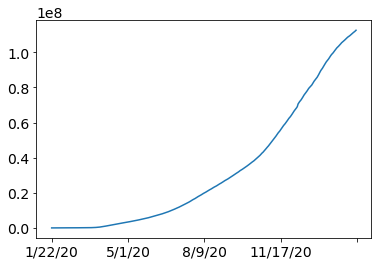

In [12]:
world.plot.line()

### 1.3.2 How to select required rows

In [13]:
# 取出 Dataframe 中  Taiwan 所有數據
df[df["Country/Region"] == "Taiwan"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21
240,NaN,Taiwan,23.7,121.0,1,1,3,3,4,5,...,937,937,938,940,941,942,942,942,942,946


In [14]:
# 取出 1/22起 Taiwan 的數據
df[df["Country/Region"] == "Taiwan"].iloc[:, 4:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21
240,1,1,3,3,4,5,8,8,9,10,...,937,937,938,940,941,942,942,942,942,946


In [15]:
# 練習取出 UK 數據
df[df["Country/Region"] == "United Kingdom"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21
253,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
254,Bermuda,United Kingdom,32.307800,-64.750500,0,0,0,0,0,0,...,695,695,697,699,699,699,699,699,703,703
255,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,114,114,114,114,114,114,114,114,114,114
256,Cayman Islands,United Kingdom,19.313300,-81.254600,0,0,0,0,0,0,...,416,419,419,425,428,428,428,431,431,431
257,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,...,4004,4009,4013,4016,4023,4025,4026,4030,4030,4031
258,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,53,54,54,54,54,54,54,54,54,54
259,Gibraltar,United Kingdom,36.140800,-5.353600,0,0,0,0,0,0,...,4223,4224,4226,4227,4228,4228,4228,4232,4234,4234
260,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,436,437,437,444,449,450,450,456,462,470
261,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,20
262,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,-1


In [16]:
# 練習取出 China 數據
df[df["Country/Region"] == "China"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,994,994,994,994,994,994,994,994,994,994
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,1046,1046,1046,1046,1046,1046,1047,1047,1047,1047
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,591,591,591,591,591,591,591,591,591,591
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,548,548,548,548,548,548,549,549,549,549
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,187,187,187,187,187,187,187,187,187,187
63,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,2171,2177,2180,2180,2183,2184,2187,2196,2196,2198
64,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,267,267,267,267,267,267,267,267,267,267
65,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,147
66,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,171,171,171,171,171,171,171,171,171,171
67,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317


In [17]:
# 取出 中共國所有省分確診數
df[df["Country/Region"] == "China"].iloc[:, 4:].sum()

1/22/20       548
1/23/20       643
1/24/20       920
1/25/20      1406
1/26/20      2075
            ...  
2/20/21    100727
2/21/21    100758
2/22/21    100784
2/23/21    100807
2/24/21    100832
Length: 400, dtype: int64

In [38]:
# 副程式 - 方便後續計算用
selected_rows = lambda d, c: d[d["Country/Region"] == c].iloc[:, 4:].sum()

def country_rows(c):
    return selected_rows(df, c)

def active_data(c): # 確診數 - 痊癒數 - 死亡數，表彰公衛體系的能力
    i = selected_rows(df, c)
    d = selected_rows(death, c)
    r = selected_rows(recovered, c)
    return i - d - r

def country_df(c):  
    d = pd.DataFrame(data=country_rows(c), columns=[c])
    d["Active"] = active_data(c)
    # 原本的 index 不具意義，故用不到
    d.reset_index(drop= True, inplace = True)
    # 強制將日期轉成 index 作為後續圖表繪製用
    d.set_index(pd.DatetimeIndex(df.columns[4:]), inplace = True)
    return d

## 1.4 - Investigate Data

In [19]:
# 國家名稱輸入判定
def in_list(c):
    return c in list(df["Country/Region"])

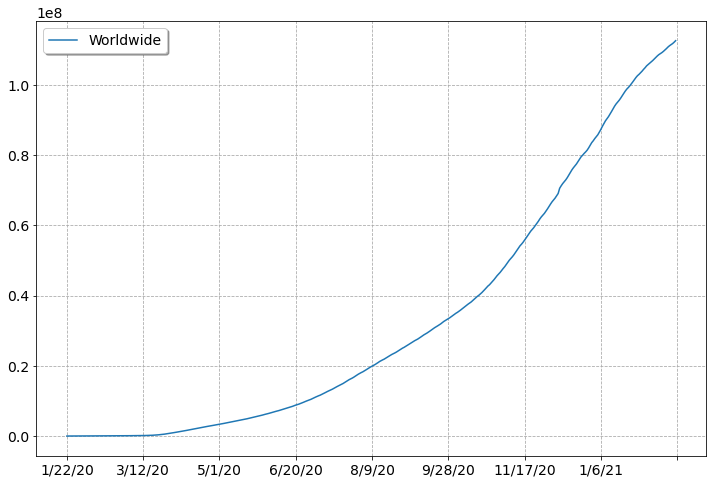

In [20]:
world = df.iloc[:, 4:].sum()

wdf = pd.DataFrame(data = world, columns=["Worldwide"])

fig, ax = plt.subplots(figsize = (12, 8))
wdf.plot.line(ax = ax)
#  frameon 邊框使用粗線，shadow 使用陰影
ax.legend(loc = "upper left", frameon = True, shadow = True, fontsize = 14)
# 新增格線 b = "on", which = 主格線 major 副格線 minor，顏色 #aaaaaa = 灰色
ax.grid(b = "on", which = "major", ls = "--", color = "#aaaaaa")

In [21]:
watch_list = ["Korea, South", "Taiwan", "Japan"]

### 1.4.1 pandas plot

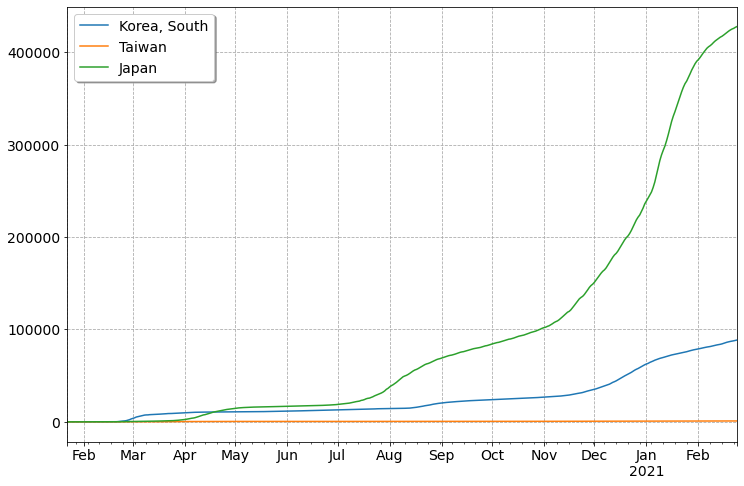

In [30]:
wdf = pd.DataFrame()
for x in watch_list:
    wdf[x] = country_rows(x)
# 以日期作為 index
wdf.set_index(pd.DatetimeIndex(df.columns[4:]), inplace = True, )

fig, ax = plt.subplots(figsize=(12, 8))
wdf.plot.line(ax = ax)
#  frameon 邊框使用粗線，shadow 使用陰影
ax.legend(loc = "upper left", frameon = True, shadow = True, fontsize = 14)
# 新增格線 b = "on", which = 主格線 major 副格線 minor，顏色 #aaaaaa = 灰色
ax.grid(b = "on", which = "major", ls = "--", color = "#aaaaaa")

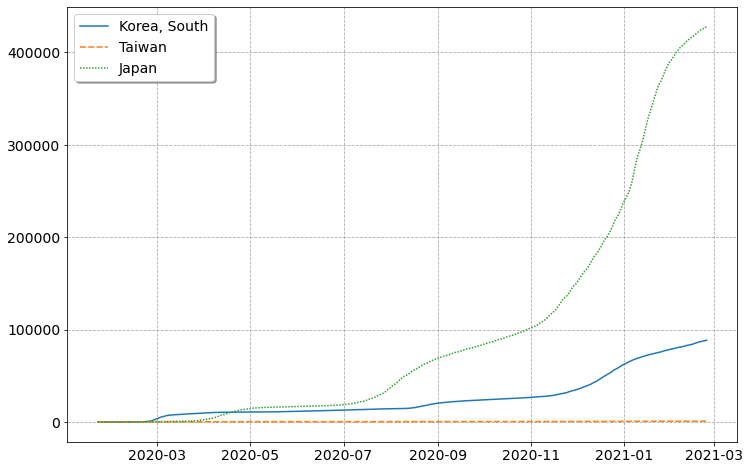

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data = wdf)
#  frameon 邊框使用粗線，shadow 使用陰影
ax.legend(loc = "upper left", frameon = True, shadow = True, fontsize = 14)
# 新增格線 b = "on", which = 主格線 major 副格線 minor，顏色 #aaaaaa = 灰色
ax.grid(b = "on", which = "major", ls = "--", color = "#aaaaaa")

### 1.4.2 matplotlib pyplot

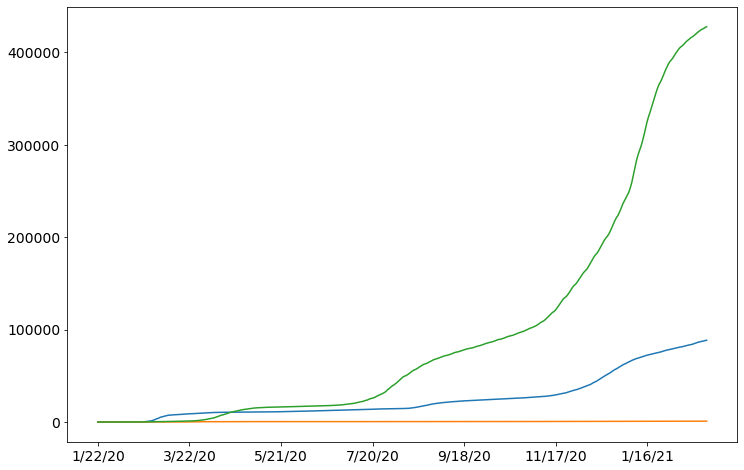

In [35]:
fig, ax = plt.subplots(figsize = (12, 8))
for x in watch_list:
    ax.plot(country_rows(x), label = x)

xlbs_total = df.columns[4:]
# 60的意思為 每60天訂為一個tig
xlbs = [xlbs_total[i] for i in range(0, len(xlbs_total), 60)]
xlocs = range(0, len(xlbs_total), 60)
ax.set_xticks(xlocs)
ax.set_xticklabels(xlbs)
plt.show()

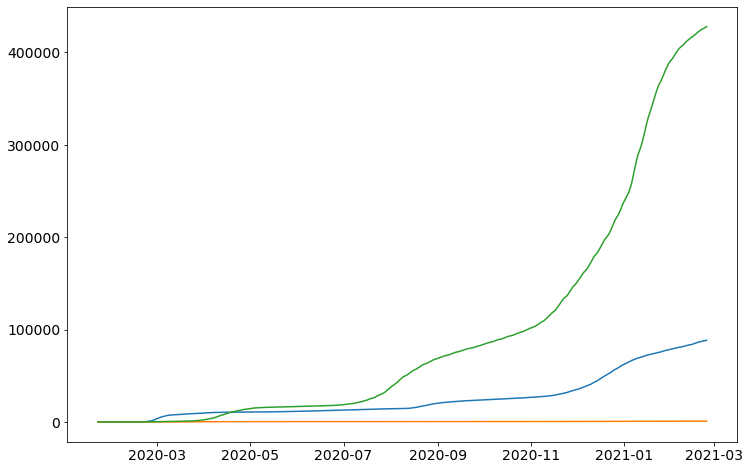

In [36]:
fig, ax = plt.subplots(figsize = (12, 8))
for x in watch_list:
    ax.plot(wdf[x] , label = x)


## 1.5 - Plot Practice: Active Trend

- [seaborn set_style](https://seaborn.pydata.org/generated/seaborn.set_style.html)
- [Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)
- [sns.reset_defaults()](https://seaborn.pydata.org/generated/seaborn.reset_defaults.html?highlight=reset#seaborn.reset_defaults) 

### 1.5.1 pandas.plot.line() 

In [39]:
zdf = country_df("Taiwan")
zdf

,Taiwan,Active
2020-01-22,1,1
2020-01-23,1,1
2020-01-24,3,3
2020-01-25,3,3
2020-01-26,4,4
...,...,...
2021-02-20,942,40
2021-02-21,942,40
2021-02-22,942,40
2021-02-23,942,40


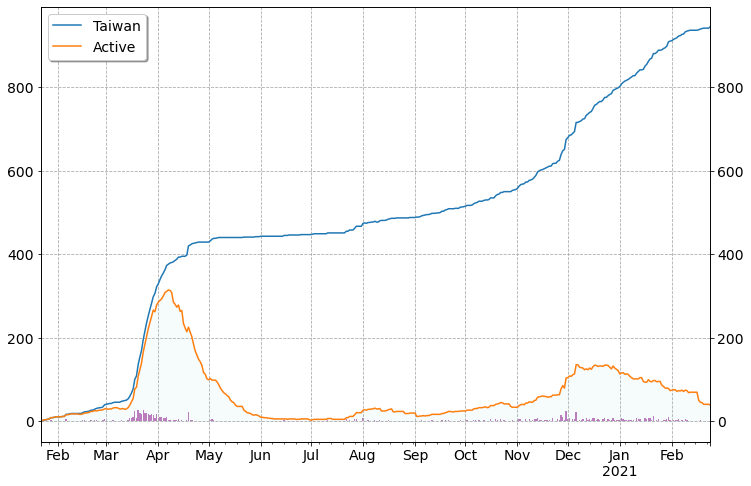

In [46]:
def active_trend(to_watch):
    fig, ax = plt.subplots(figsize = (12, 8))
    bdf = country_df(to_watch)
    bdf.plot.line(ax = ax)
    # 折線下方填滿
    ax.fill_between(bdf.index, bdf.Active, color = "lightblue", alpha=0.1)
    # diff 表示差值，diff(1) 表示與前一天的差值
    ax.bar(bdf.index, bdf[to_watch].diff(1), color = "purple", alpha = 0.5)
    ax.legend(loc = "best", frameon = True, shadow = True, fontsize=14)
    ax.grid(b = "on", which = "major", ls = "--", color = "#aaaaaa")
    
    # 複製座標軸 y
    ax2 = ax.twinx()
    ylim = ax.get_ylim()
    ax2.set_ylim(ylim)
    
active_trend("Taiwan")

### 1.5.2 seaborn

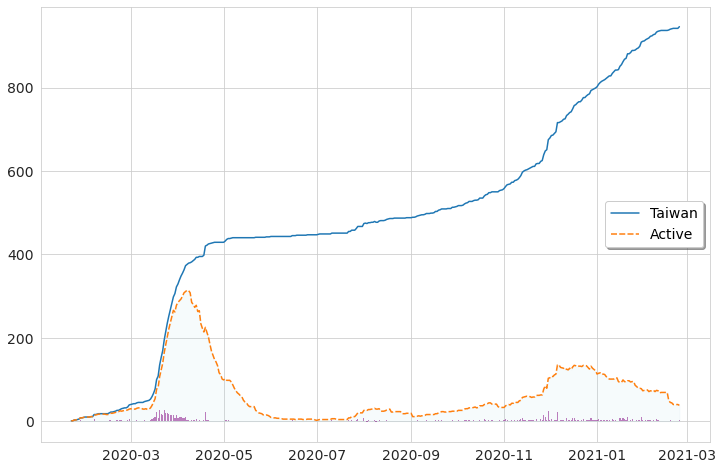

In [51]:
def sns_active_trend(to_watch):
    bdf = country_df(to_watch)
    f = plt.figure(figsize=(12, 8))
    # mpl底層的API，可以將整張畫布等比例切開 (1,1)意思為 1x1，僅有單一圖表
    gs = f.add_gridspec(1, 1)
    
    with sns.axes_style("whitegrid"):
        ax = f.add_subplot(gs[0, 0])
        ax = sns.lineplot(data = bdf)
    
    # 折線下方填滿
    ax.fill_between(bdf.index, bdf.Active, color = "lightblue", alpha=0.1)
    # diff 表示差值，diff(1) 表示與前一天的差值
    ax.bar(bdf.index, bdf[to_watch].diff(1), color = "purple", alpha = 0.5)
    ax.legend(loc = "best", frameon = True, shadow = True, fontsize=14)
#     ax.grid(b = "on", which = "major", ls = "--", color = "#aaaaaa")
    
#     # 複製座標軸 y
#     ax2 = ax.twinx()
#     ylim = ax.get_ylim()
#     ax2.set_ylim(ylim)
    
sns_active_trend("Taiwan")

## 1.6 New Case Trend

In [53]:
to_watch = "Taiwan"
ndf = country_df(to_watch)
new_confirmed = ndf[to_watch].diff(1)
new_confirmed

2020-01-22    NaN
2020-01-23    0.0
2020-01-24    2.0
2020-01-25    0.0
2020-01-26    1.0
             ... 
2021-02-20    1.0
2021-02-21    0.0
2021-02-22    0.0
2021-02-23    0.0
2021-02-24    4.0
Name: Taiwan, Length: 400, dtype: float64

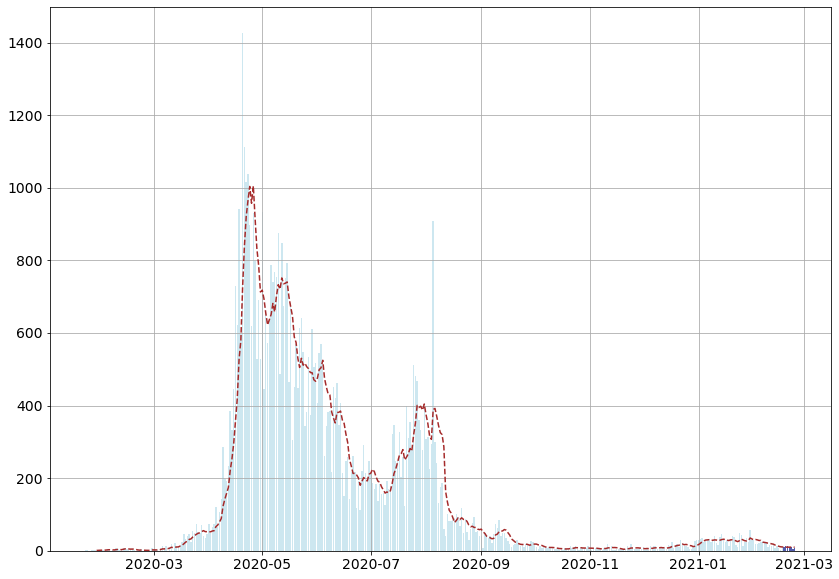

In [58]:
def new_case_trend(to_watch, w_size= 7):
    ndf = country_df(to_watch)
    
    # 每日新增的確診數
    daily_confirmed = ndf[to_watch].diff(1)
    
    # 七日平均確診數
#     windows_size = w_size
    # Pandas 內建 rolling函數，可以用於計算指定數值的結果
    avg7 = ndf[to_watch].diff(1).rolling(w_size).mean()
    
    fig, ax = plt.subplots(figsize = (14, 10))
    ax.bar(ndf.index[:-w_size], daily_confirmed[:-w_size], color = "lightblue", alpha = 0.6)
    ax.bar(ndf.index[-w_size:], daily_confirmed[-w_size:], color = "navy", alpha = 0.6)
    
    ax.plot(ndf.index, avg7, ls = "--", color = "brown")
    ax.grid(b = "on", which = "major", color = "#aaaaaa")

new_case_trend("Singapore")

# ② Manual Works

## 2.1 - Taiwan.csv

- [疫情數據全報導](https://udn.com/news/COVID19)：此報導會每日更新網頁內容
- [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

**補充說明：**

根據 2020-08-01 衛生福利部疾病管制署記者會公佈資料：

> 指揮中心統計，國內截至目前累計81,826例(含80,728例排除)，其中474例確診，分別為382例境外移入，55例本土病例、36例敦睦艦隊及1例待釐清。

因此 taiwan.csv 需資料增加一個欄位 tbd (to_be_decided)，新的版本更名為 taiwan_aug.csv，以下使用的範例資料檔案，為更名前的最後一個檔案，因此資料到 2020-07-31 為止。

In [82]:
# 下載最後一個舊版 taiwan.csv 

fetch_file_via_requests(
    DropboxLink('upr5klwy07bba3h', 'tawiwan.csv'), covid_dir
)

'C:\\Users\\TyKA\\Google Drive\\adventures\\covid19\\tawiwan.csv'

In [86]:
csv_path = os.path.join(covid_dir, 'tawiwan.csv')

In [87]:
csv_path

'C:\\Users\\TyKA\\Google Drive\\adventures\\covid19\\tawiwan.csv'

In [91]:
tdf = pd.read_csv(csv_path, parse_dates=["date"], index_col = ["date"])

tdf["Active"] = tdf.Taiwan - tdf.Deaths - tdf.Recovered
tdf.tail()

,Taiwan,Local,Imported,Deaths,Recovered,Panshi,Active
date,,,,,,,
2020-07-27,462,55,371,7,440,36,15
2020-07-28,467,55,376,7,440,36,20
2020-07-29,467,55,376,7,440,36,20
2020-07-30,467,55,376,7,440,36,20
2020-07-31,467,55,376,7,440,36,20


## 2.2 Trending Chart

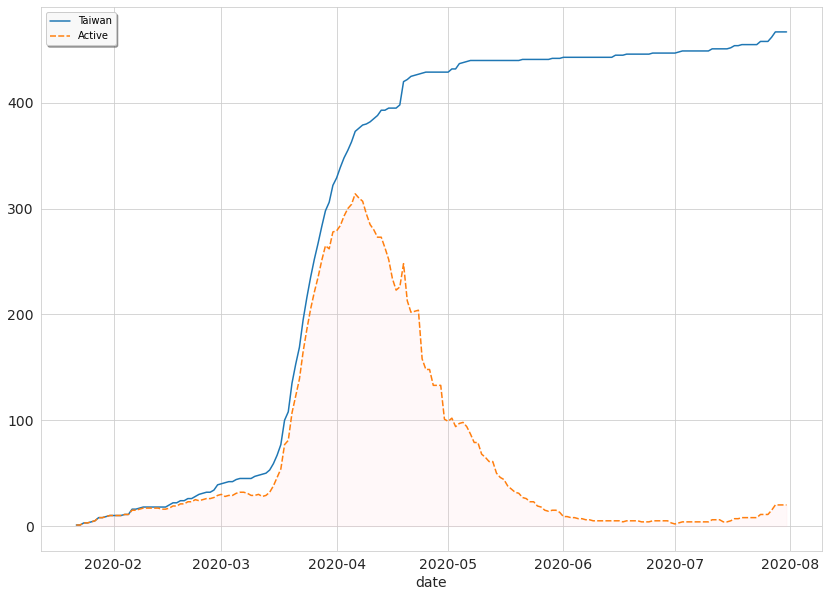

In [94]:
#  tdf.Taiwan - tdf.Deaths - tdf.Recovered
# 'Active Case = Accumulated Infection - Deaths - Recovered'

f = plt.figure(figsize=(14, 10))
gs = f.add_gridspec(1,  1)

adf = tdf[["Taiwan", "Active"]].copy()

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 0])
    ax = sns.lineplot(data = adf)

ax.fill_between(adf.index, adf.Active, color = "pink", alpha = 0.1)
ax.legend(loc = "best", frameon = True, shadow = True, facecolor = "#f8f8f8")


## 2.3 - Daily Cases

In [96]:
zdf = pd.DataFrame()
zdf["Taiwan"] = tdf.Taiwan.diff(1)
zdf["Local"] = tdf.Local.diff(1)
zdf["Imported"] = tdf.Imported.diff(1)
zdf["Panshi"] = tdf.Panshi.diff(1)

zdf.drop(zdf.index[0], axis = 0, inplace = True)
zdf

,Taiwan,Local,Imported,Panshi
date,,,,
2020-01-23,0.0,0.0,0.0,0.0
2020-01-24,2.0,0.0,2.0,0.0
2020-01-25,0.0,0.0,0.0,0.0
2020-01-26,1.0,0.0,1.0,0.0
2020-01-27,1.0,0.0,1.0,0.0
...,...,...,...,...
2020-07-27,4.0,0.0,4.0,0.0
2020-07-28,5.0,0.0,5.0,0.0
2020-07-29,0.0,0.0,0.0,0.0


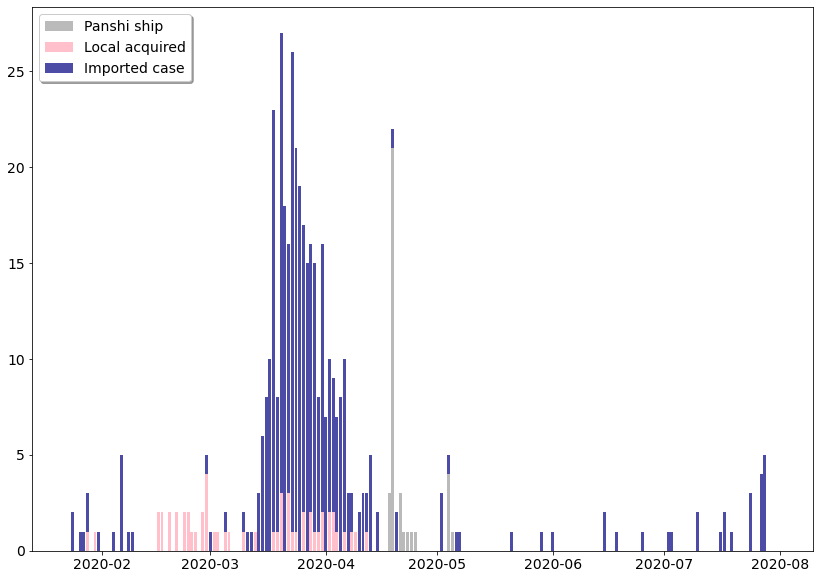

In [97]:
fig, ax  = plt.subplots(figsize=(14, 10))
ax.bar(zdf.index, zdf.Panshi, color = "darkgray", alpha = 0.8,
       label = "Panshi ship")
ax.bar(zdf.index, zdf.Local, color = "pink", bottom = zdf.Panshi, 
       label="Local acquired")
ax.bar(zdf.index, zdf.Imported, color = "navy", alpha = 0.7,
       bottom = zdf.Panshi + zdf.Local, label = "Imported case")
ax.legend(loc = "upper left", frameon = True, shadow = True, fontsize = 14)

## 2.4 - Complicated tw_newcase()

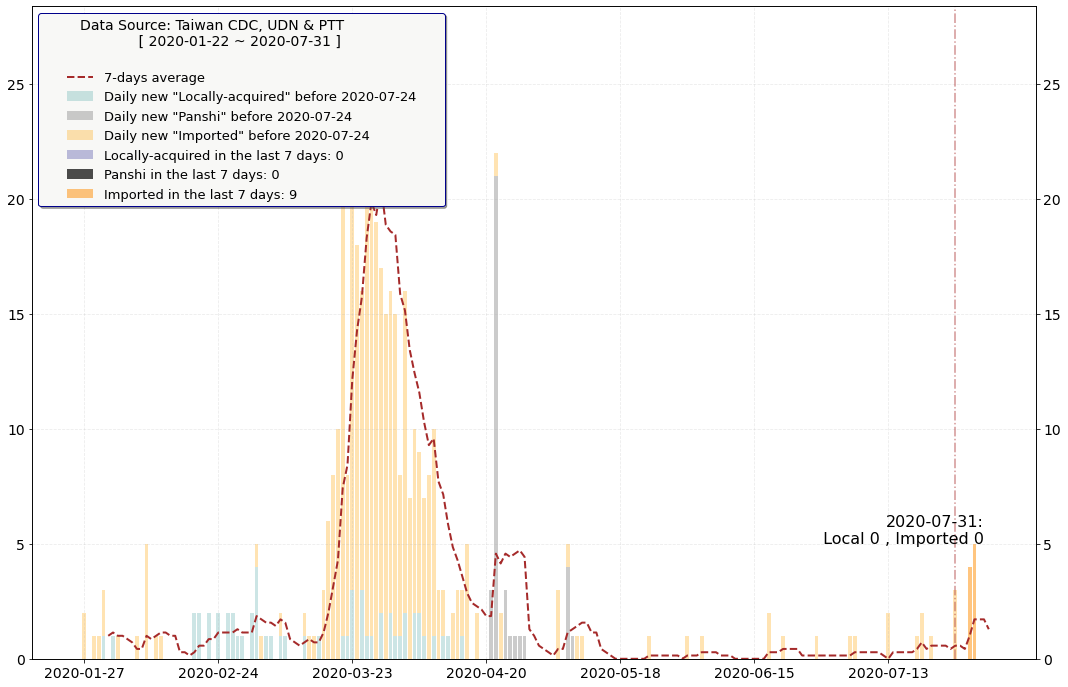

In [98]:
def tw_newcase():

    dsource = u'Data Source: Taiwan CDC, UDN & PTT'
    durl = 'https://bit.ly/3dj7zgg, https://bit.ly/33AQlGr & https://reurl.cc/xZgqA5'

    ddate = '[ %s ~ %s ]' %  \
        (str(tdf.index[0]).split(' ')[0] , str(tdf.index[-1]).split(' ')[0])    
    to_watch = 'Taiwan'
    window_size = 1
    
    new_confirmed = tdf[to_watch].diff(1)
    r7 = tdf[to_watch].diff(1).rolling(7).mean()

    fig, ax = plt.subplots(figsize = (18, 12))

    ax.bar(tdf.index[window_size:-7], tdf.Local.diff(1)[window_size:-7], 
        label = 'Daily new "Locally-acquired" before %s' % str(tdf.index[-8]).split(' ')[0], 
        color = 'teal' , alpha = 0.2)
    
    ax.bar(tdf.index[window_size:-7], tdf.Panshi.diff(1)[window_size:-7], 
        label = 'Daily new "Panshi" before %s' % str(tdf.index[-8]).split(' ')[0], 
        bottom = tdf.Local.diff(1)[window_size:-7],
        color = 'darkgray' , alpha = 0.6)   
    
    ax.bar(tdf.index[window_size:-7], tdf.Imported.diff(1)[window_size:-7], 
        bottom = tdf.Local.diff(1)[window_size:-7] + tdf.Panshi.diff(1)[window_size:-7], 
        label = 'Daily new "Imported" before %s' % str(tdf.index[-8]).split(' ')[0], 
        alpha = 0.3, color = 'orange')
    
    ax.bar(tdf.index[-7:], tdf.Local.diff(1)[-7:],  
        label = 'Locally-acquired in the last 7 days: %d' % \
        ( tdf.Local[-1] - tdf.Local[-8]),
        color = 'navy' , alpha = 0.25)
    
    ax.bar(tdf.index[-7:], tdf.Panshi.diff(1)[-7:],  
        label = 'Panshi in the last 7 days: %d' % \
        ( tdf.Panshi[-1] - tdf.Panshi[-8]),
        bottom = tdf.Local.diff(1)[-7:],
        color = 'black' , alpha = 0.7)
    
    ax.bar(tdf.index[-7:], tdf.Imported.diff(1)[-7:], 
        label = 'Imported in the last 7 days: %d' % \
        ( tdf.Imported[-1] - tdf.Imported[-8]),
        bottom = tdf.Local.diff(1)[-7:] + tdf.Panshi.diff(1)[-7:], alpha = 0.5, color = 'darkorange')

    ax.plot(r7, color = 'brown', lw = 2, ls = '--', label = '7-days average')
    ax.axvline(x = tdf.index[-8], ls = '-.', color = 'brown', alpha = 0.5)
    # ax.plot(tdf.Taiwan.diff(1)[window_size:], color = 'blue', alpha = 0.75)

    ax.legend( loc = 'upper left', frameon = True, shadow = True, 
        facecolor = '#f8f8f6', 
        edgecolor = 'darkblue',
        title = '{:^50}\n{:^70}\n'.format(dsource, ddate), title_fontsize = 14,
        # title = '{:^60}\n{:^60}\n{:^90}\n'.format(dsource, durl, ddate), title_fontsize = 13,
        fontsize = 13)
    ax.grid (b = 'on', which = 'major', alpha = 0.25, ls = '--')
    xticks_locataion = [tdf.index[x] for x in range(2, len(tdf.index), 28)]
    xticks_labels = [str(tdf.index[i].date()) for i in range(5, len(tdf.index), 28)]
    ax.set_xticks(xticks_locataion)
    ax.set_xticklabels(xticks_labels)    
    ax2 = ax.twinx()
    ylim = ax.get_ylim()  
    ax2.set_ylim(ylim)
    ax2.text(tdf.index[-2], tdf.Taiwan.diff(1)[-1]+5, '%s:\n Local %d , Imported %d' % 
        ((str(tdf.index[-1]).split(' ')[0]), tdf.Local.diff(1)[-1], tdf.Imported.diff(1)[-1]),
        fontsize = 16, ha = 'right')
    
tw_newcase()